<a href="https://colab.research.google.com/github/mdkurashin/Portfolio/blob/main/bankCards_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ds/Churn_Modelling.csv')

Одномерный анализ признаков

In [7]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#проверка на пропущенные значения
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Geography'].nunique()

3

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
#некоторая информация по возрасту
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<Axes: xlabel='Exited', ylabel='count'>

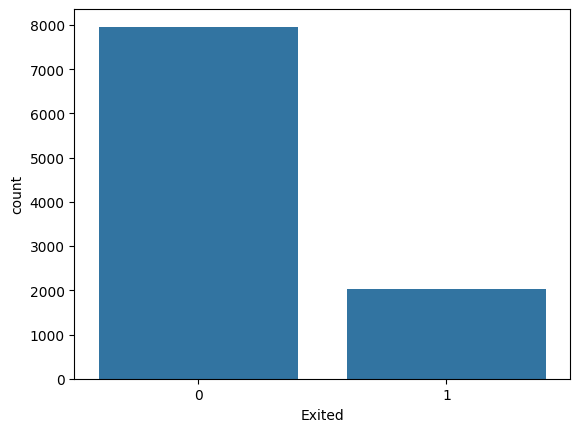

In [ ]:
#диаграмма по количеству ушедших и не ушедших пользователей
sns.barplot(df['Exited'].value_counts())

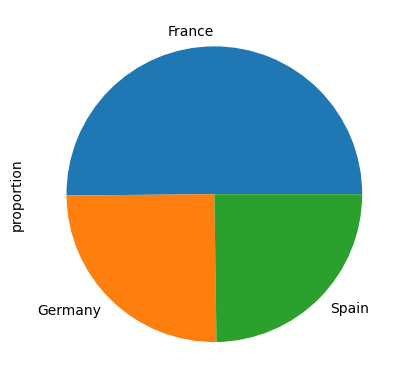

In [ ]:
#диаграмма по соотношению пользователей по странам проживания
(df['Geography'].value_counts(normalize=True)).plot.pie();

<Axes: ylabel='Age'>

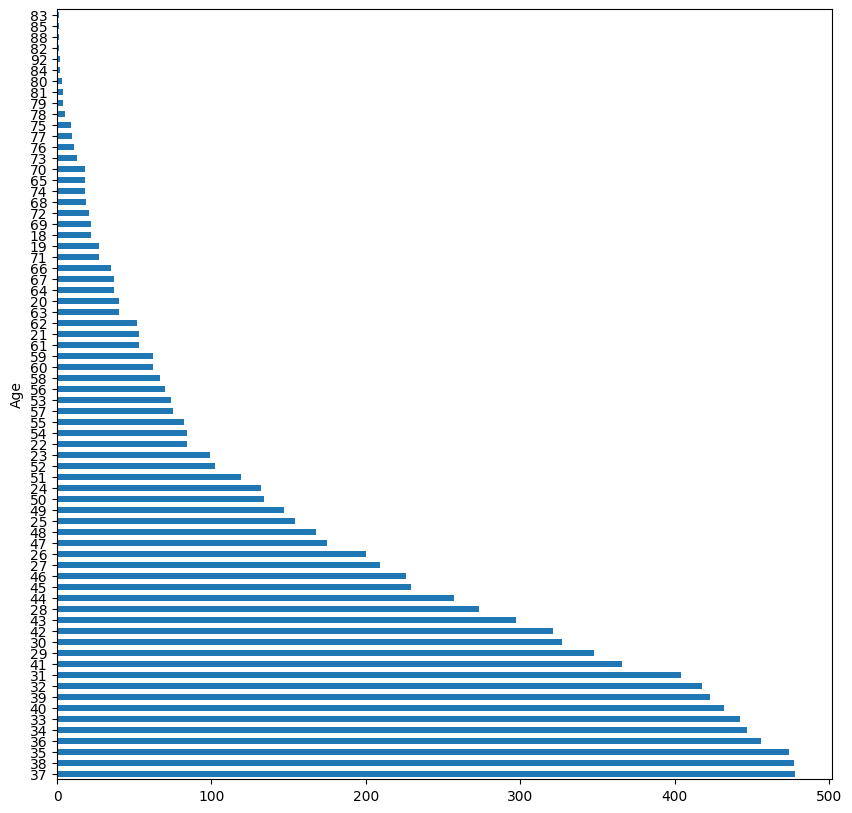

In [ ]:
#диаграмма по количеству пользователей по возрасту
plt.figure(figsize=(10, 10))
df['Age'].value_counts().plot.barh()

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

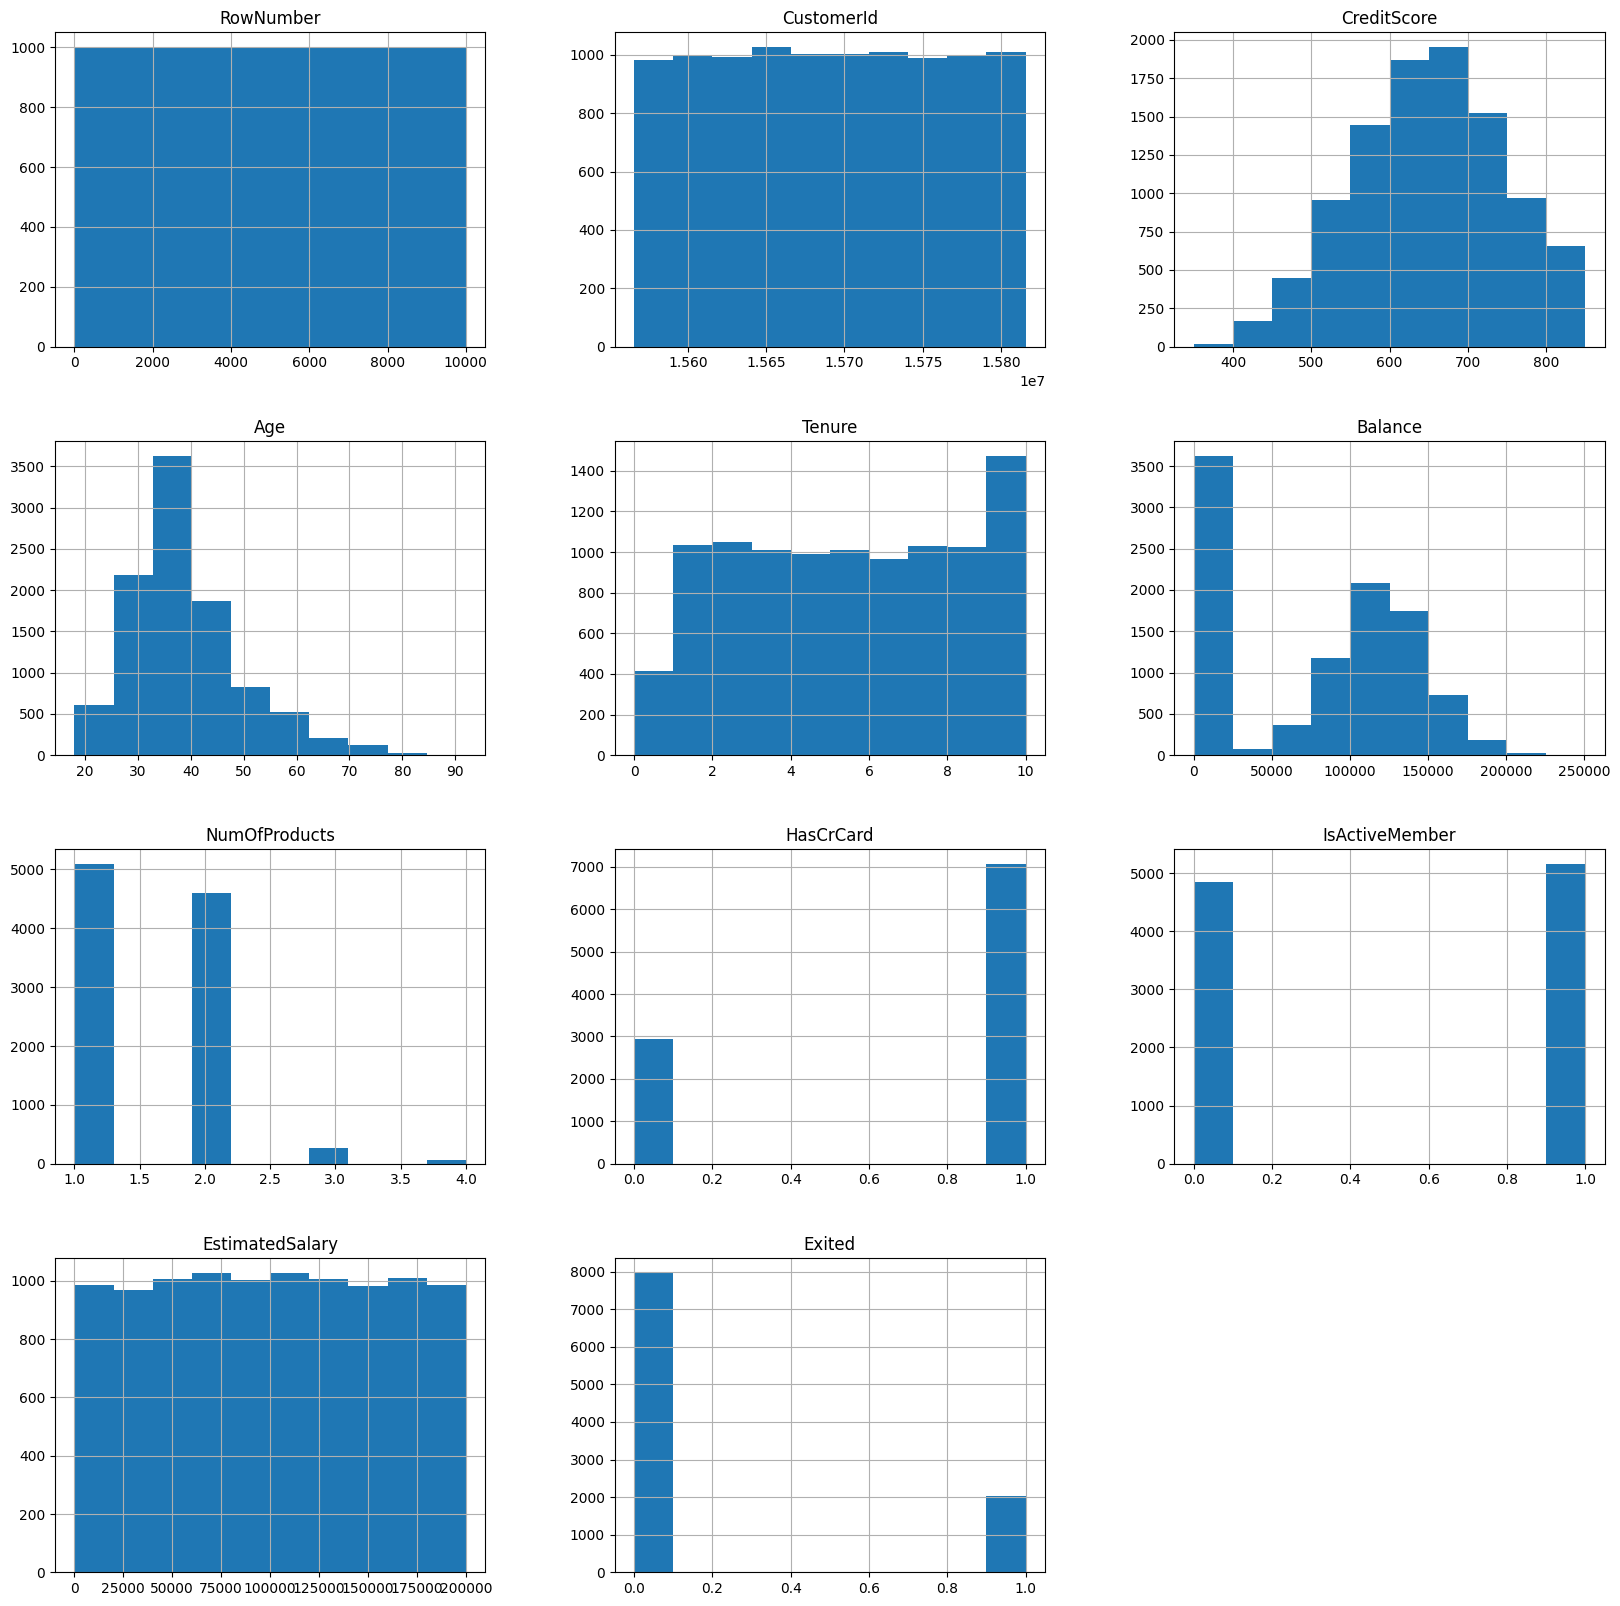

In [ ]:
df.hist(figsize=(20,20))

<Axes: ylabel='CreditScore'>

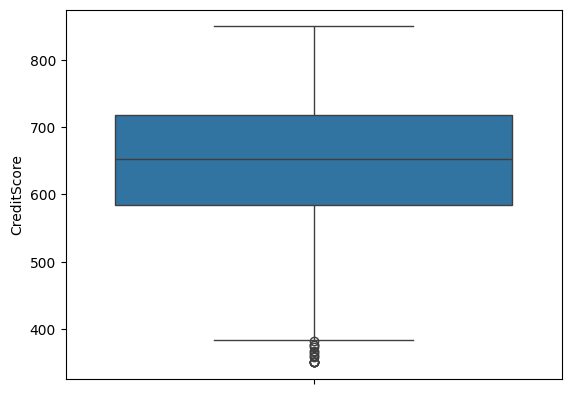

In [ ]:
#бокс-плот кредитного рейтинга
sns.boxplot(df['CreditScore'])

<Axes: ylabel='Age'>

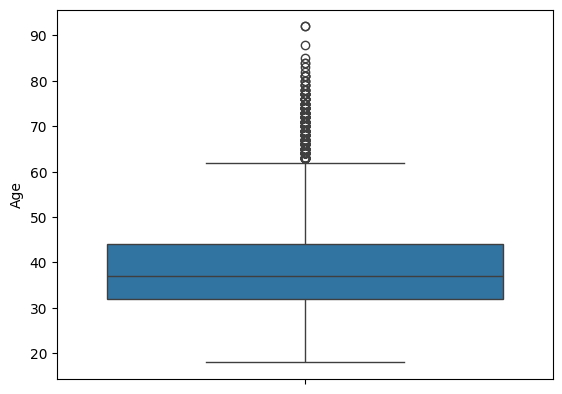

In [ ]:
#бокс-плот возраста
sns.boxplot(df['Age'])

<Axes: ylabel='Density'>

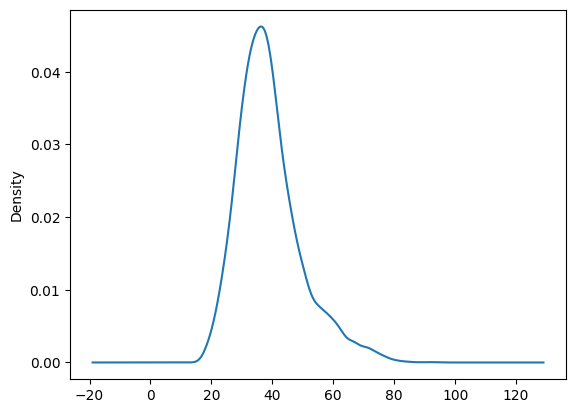

In [ ]:
#плотность распределения вероятности
df['Age'].plot.density()

Двумерный анализ признаков

In [ ]:
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [ ]:
df['CustomerId'].nunique()

10000

In [ ]:
#преобразование названия стран в числа для последующих операций
df['Geography_num'] = df['Geography']

df['Geography_num'].replace('France', 0, inplace = True)
df['Geography_num'].replace('Spain', 1, inplace = True)
df['Geography_num'].replace('Germany', 2, inplace = True)

In [ ]:
#преобразование пола в числа для последующих операций
df['Gender'].replace('Male', 0, inplace=True)
df['Gender'].replace('Female', 1, inplace=True)

In [ ]:
#корреляция
corr = df[features_eda].corr()
corr.T

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.016936
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771


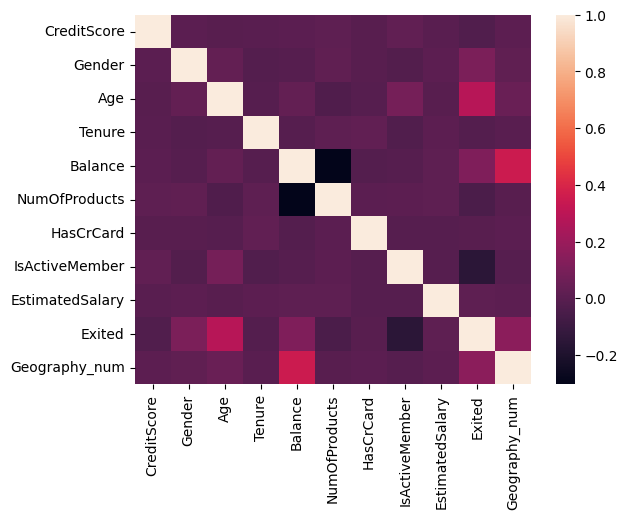

In [ ]:
#тепловая карта корреляциями между признаками
sns.heatmap(corr);

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

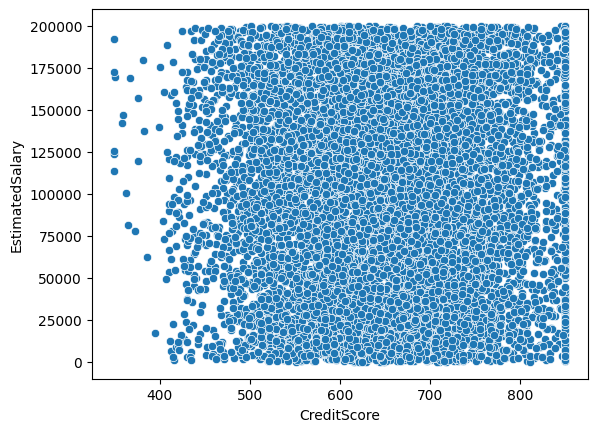

In [ ]:
#диаграмма рассеивания между кредитным рейтингом и предполагаемой зарплатой
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

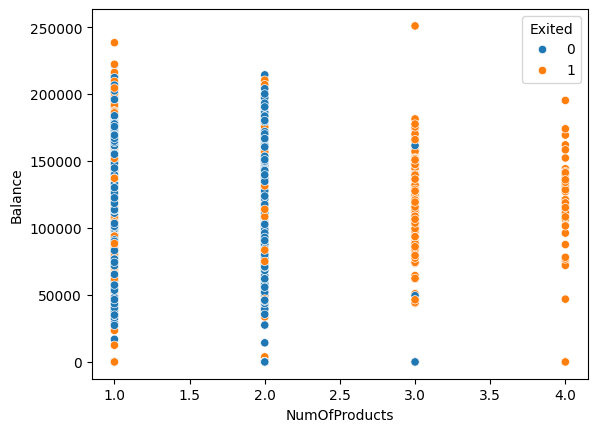

In [ ]:
#диаграмма между количеством продуктов и балансом
sns.scatterplot(data=df, x='NumOfProducts', y='Balance', hue='Exited')

<Axes: xlabel='Exited', ylabel='Age'>

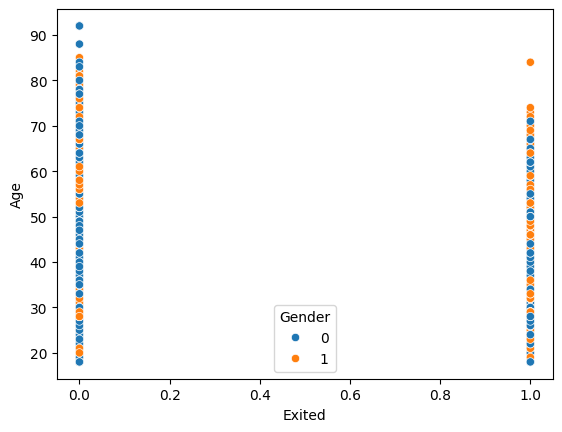

In [ ]:
#диаграмма между информацией о том, ушел ли клиент, и его возрастом
sns.scatterplot(data = df, x='Exited', y='Age', hue = 'Gender')

<Axes: xlabel='Geography', ylabel='Balance'>

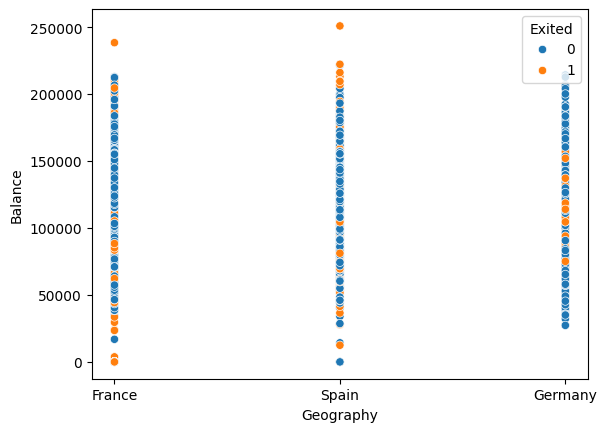

In [ ]:
#диаграмма между страной проживания и балансом
sns.scatterplot(data=df, x='Geography', y='Balance', hue='Exited')

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

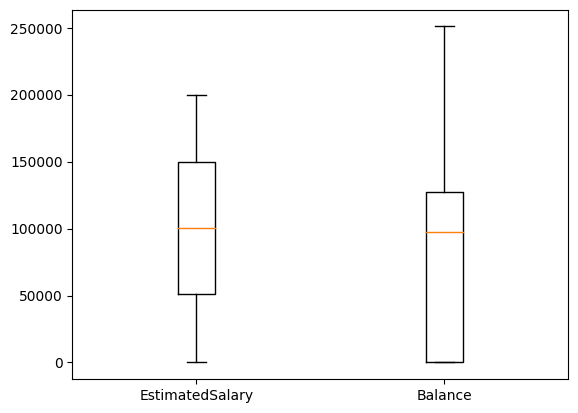

In [ ]:
#два бокс-плота: предполагаем зарплата и баланс
features = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(features.values())
ax.set_xticklabels(features.keys())

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

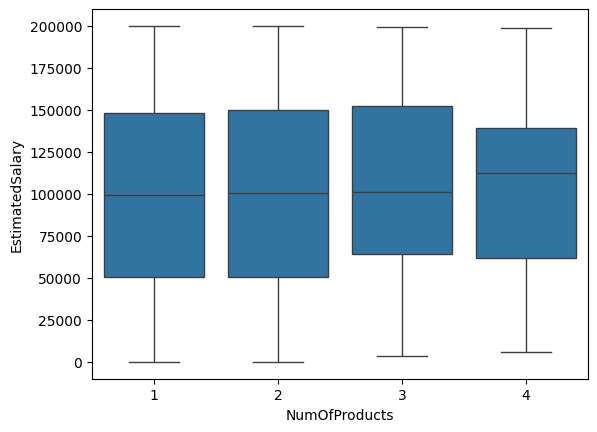

In [ ]:
#бокс-плоты предполагаемой зарплаты в разрезе количества продуктов
sns.boxplot(data=df, y='EstimatedSalary', x='NumOfProducts')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

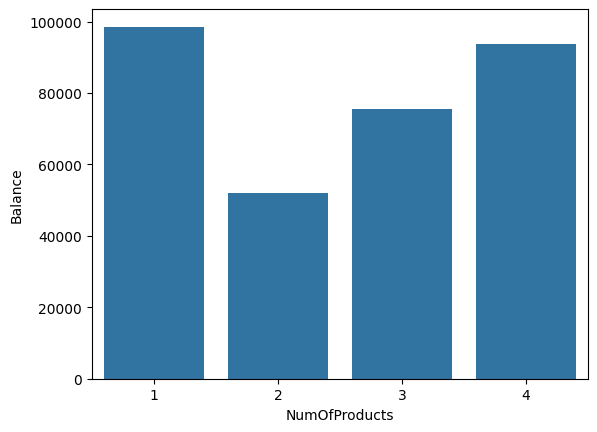

In [ ]:
#диаграмма среднего баланса в разрезе количества продуктов
sns.barplot(df.groupby('NumOfProducts')['Balance'].mean())

Многомерный анализ признаков


In [ ]:
#сводная таблица - средний баланс в разрезе стран и количества продуктов
df_temp = pd.pivot_table(data = df, index = 'Geography', columns = 'NumOfProducts', values = 'Balance')
df_temp

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.877896,31828.097047,50071.822500,71362.731379
Germany,119868.328139,119341.245038,121572.672396,121442.305417
Spain,90595.373063,32690.852688,48385.897121,91407.651429


<Axes: xlabel='NumOfProducts', ylabel='Geography'>

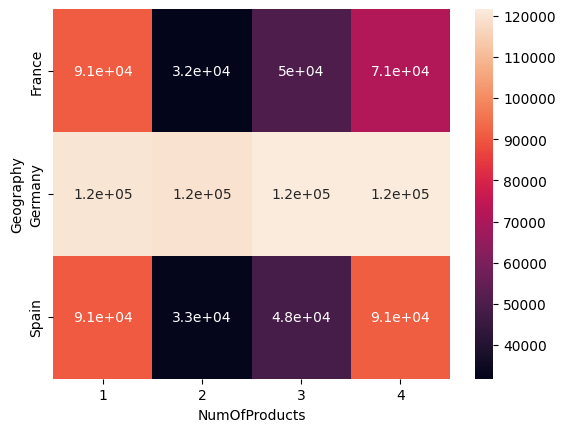

In [ ]:
#диаграмма сводной таблицы выше
sns.heatmap(df_temp, annot = True)

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


In [ ]:
df.to_excel('file2.xlsx', header=True, index = True)

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64